# Exploratory Data Analysis

##### The following notebook contains the general analysis of the utilized database features identifying any data processing to be done before the model training phase. Any findings along the analysis will be the inputs for the data processing module python script to be found in the "main" folder. 

guideline:
1) separate numerical features from categorical features.

### Importing libraries and ignore unnecessary warnings

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the dataset 

In [51]:
data_url = "https://drive.google.com/file/d/1j48kuBVZ70pe_GsT97geOiE8ye7jpc4L/view?usp=drive_link"
inital_url = "https://drive.google.com/uc?id="

data_url = inital_url + data_url.split('/')[-2]
df = pd.read_csv(data_url)

### Feature description

######
1) ID: Unique identifier for each row. (Integer)
2) Patient: Pacient name. The original data has been subtituted by a sequential identifier. (string)
3) Age: Age of the patient. (Integer)
4) Gender: Sex identifier. (Integer)
5) Height: Patient height in cm. (integer)
6) Weight: Patient weight in kilograms. (integer)
7) Blood Pressure: Pressure in mmHg measured as systolic over diastolic values. (string)
8) Cholesterol: Total Cholesterol in mg/dL. (integer)
9) Glucose: Glucose in mg&DL. (integer)
10) Smoker: Identifies the patient as a regular smoker (yes) or not (no). (string)
11) Exercise: Average number of exercise hours per week. (integer)
12) Heart Attack: identifies if the patient has had a hear attack (1) or not (0). (integer).

### Data processing:

#### Preliminary view

In [52]:
df.head(5)

,ID,Patient,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,Patient_0001,45,Male,175,80,120/80,200,90,No,3,0
1,2,Patient_0002,35,Female,160,65,110/70,180,80,No,2,0
2,3,Patient_0003,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Patient_0004,40,Female,165,70,115/75,190,85,No,3,0
4,5,Patient_0005,50,Male,170,75,125/80,210,92,Yes,2,1


#### Elimination of unnecessary features.

In [53]:
# The ID and Patient columns are not necessary for the analysis and will be eliminated.
df2 = df.drop(['ID', 'Patient'], axis=1)

#### Separating Pressure column in systolic and diastolic values.

In [54]:
df2[['systolic_pressure', 'diastolic_pressure']] = df2['Blood Pressure(mmHg)'].str.split('/', expand=True)
df2['systolic_pressure'] = df2['systolic_pressure'].astype(int)
df2['diastolic_pressure'] = df2['diastolic_pressure'].astype(int)
df2.drop(columns=['Blood Pressure(mmHg)'], inplace=True)

#### Adding BMI as a feature

In [56]:
df2['BMI'] = df2['Weight(kg)'] / ((df2['Height(cm)']/100 )** 2)

#### Checking overall feature info and behavior.

##### Code>

In [57]:
# Check basic feature info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   724 non-null    int64  
 1   Gender                724 non-null    object 
 2   Height(cm)            724 non-null    int64  
 3   Weight(kg)            724 non-null    int64  
 4   Cholesterol(mg/dL)    724 non-null    int64  
 5   Glucose(mg/dL)        724 non-null    int64  
 6   Smoker                724 non-null    object 
 7   Exercise(hours/week)  724 non-null    int64  
 8   Heart Attack          724 non-null    int64  
 9   systolic_pressure     724 non-null    int32  
 10  diastolic_pressure    724 non-null    int32  
 11  BMI                   724 non-null    float64
dtypes: float64(1), int32(2), int64(7), object(2)
memory usage: 62.3+ KB


In [58]:
## Identify numerical and categorical columns and storing them in separate lists.

categorical_features = [feature for feature in df2.columns if df2[feature].dtypes == 'O']
numerical_features = [feature for feature in df2.columns if feature not in categorical_features]

print(f"Numerical columns: {numerical_features}\n")
print(f"Categorical columns: {categorical_features}")

Numerical columns: ['Age', 'Height(cm)', 'Weight(kg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Exercise(hours/week)', 'Heart Attack', 'systolic_pressure', 'diastolic_pressure', 'BMI']

Categorical columns: ['Gender', 'Smoker']


In [59]:
## Checking the unique values of the categorical features
for feature in categorical_features:
    print(f"{feature}:")
    print(f"Number of unique values: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}\n")

Gender:
Number of unique values: 2
Unique values: ['Male' 'Female']

Smoker:
Number of unique values: 2
Unique values: ['No' 'Yes']



In [69]:
## Removing the Label feature from the numerical collection
numerical_features.remove('Heart Attack')
print(f"Numerical columns: {numerical_features}")

Numerical columns: ['Age', 'Height(cm)', 'Weight(kg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Exercise(hours/week)', 'systolic_pressure', 'diastolic_pressure', 'BMI']


In [70]:
## Checking the range of numerical features
df2.describe().T[['min','max']]

,min,max
Age,30.000000,60.000000
Height(cm),155.000000,183.000000
Weight(kg),60.000000,89.000000
Cholesterol(mg/dL),170.000000,230.000000
Glucose(mg/dL),75.000000,100.000000
Exercise(hours/week),1.000000,4.000000
Heart Attack,0.000000,1.000000
systolic_pressure,105.000000,135.000000
diastolic_pressure,65.000000,85.000000
BMI,24.092971,27.084159


In [61]:
df2.describe()

,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack,systolic_pressure,diastolic_pressure,BMI
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,44.842541,171.161602,75.610497,206.022099,92.179558,2.770718,0.599448,121.662983,77.541436,25.756992
std,8.162429,6.242018,6.368595,11.224704,4.662712,0.934907,0.490349,4.000306,3.095474,0.544785
min,30.000000,155.000000,60.000000,170.000000,75.000000,1.000000,0.000000,105.000000,65.000000,24.092971
25%,38.000000,166.000000,71.000000,195.000000,88.000000,2.000000,0.000000,119.000000,75.000000,25.315454
50%,44.000000,170.000000,75.000000,210.000000,92.000000,3.000000,1.000000,122.000000,78.000000,25.909457
75%,53.000000,177.000000,81.000000,215.000000,96.000000,4.000000,1.000000,125.000000,80.000000,25.963048
max,60.000000,183.000000,89.000000,230.000000,100.000000,4.000000,1.000000,135.000000,85.000000,27.084159


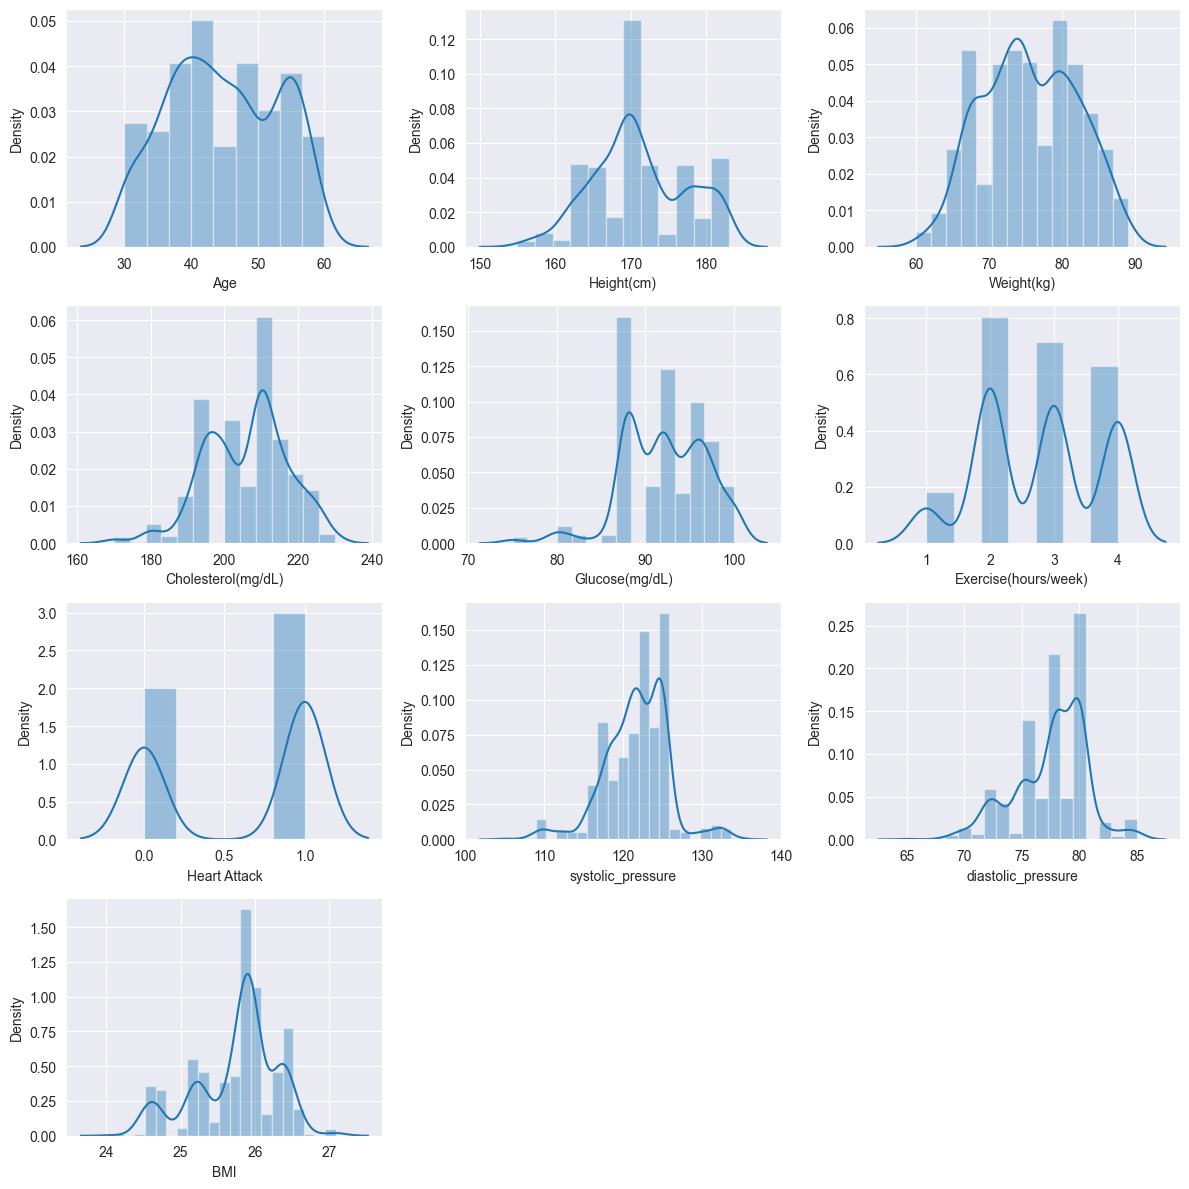

In [65]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
for i in range(len(numerical_features)):
    plt.subplot(4,3,i+1)
    sns.distplot(df2[numerical_features[i]])
    plt.tight_layout()

In [66]:
## Checking the presense of null values in the data
df2.isnull().sum()

Age                     0
Gender                  0
Height(cm)              0
Weight(kg)              0
Cholesterol(mg/dL)      0
Glucose(mg/dL)          0
Smoker                  0
Exercise(hours/week)    0
Heart Attack            0
systolic_pressure       0
diastolic_pressure      0
BMI                     0
dtype: int64

##### Summary 
- All categorical features have only 2 unique values.
- No outliers identified for any of the numerical features.
- No ilogical values present in numerical features and all show regular distributions.
- No null values to fill out.

- Based on the analysis the adjustments to be made in the data procesing phase are:
    - Eliminate the ID and Patient columns as they are unnecessary for the analysis.
    - Separating the blood pressure column in separate columnas Systolic and Diastolic features.
    - Adding the BMI feature

#### Creating pipelines to process data adjustments

In [71]:
# Defining imports

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

In [72]:
## Create Categorical pipeline to treat categorical features.

categorical_pipeline = Pipeline([
    ('categorical_encoder', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan))
])

In [73]:
## Creating numerical pipeline to treat numerical features.

numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

In [74]:
## Combine both pipelines into a single one defining which columns to process

data_processing_pipeline = ColumnTransformer([
    ('numerical processing',numerical_pipeline,numerical_features),
    ('categorical processing',categorical_pipeline,categorical_features)
], remainder='passthrough')

In [88]:
## Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [78]:
## Creating pipelines for different machine learning algorithms

model_logreg = LogisticRegression(random_state=123,max_iter=2000)
model_knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
model_randforest = RandomForestClassifier(random_state=456, n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
model_xgboost = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
model_SVM = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2)
model_gaussian = GaussianProcessClassifier(kernel=1.0 * RBF(1.0), optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0)

In [79]:
## Creating a full pipeline consists of preprocessing as well as model training

logreg_pipeline = Pipeline([('data',data_processing_pipeline),('model',model_logreg)])
knn_pipeline = Pipeline([('data',data_processing_pipeline),('model',model_knn)])
randomforest_pipeline = Pipeline([('data',data_processing_pipeline),('model',model_randforest)])
xgboost_pipeline = Pipeline([('data',data_processing_pipeline),('model',model_xgboost)])
svm_pipeline = Pipeline([('data',data_processing_pipeline),('model',model_SVM)])
tree_pipeline = Pipeline([('data',data_processing_pipeline),('model',model_tree)])
gaussina_pipeline = Pipeline([('data',data_processing_pipeline),('model',model_gaussian)])

In [82]:
## Splitting the data into independent and dependent features

Xfeatures = df2.drop(columns=['Heart Attack'],axis=1)
ylabel = df2['Heart Attack']

In [83]:
## Splitting the data into train and test data

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(Xfeatures,ylabel,test_size=0.2,random_state=195)

The cross validation score for the logreg based on accuracy score is 0.995 +/= 0.011
Precision: 0.995
Recall: 0.995
F1 Score: 0.995
Confusion Matrix:
[[227   2]
 [  1 349]]
The cross validation score for the KNN based on accuracy score is 0.99 +/= 0.016
Precision: 0.990
Recall: 0.990
F1 Score: 0.990
Confusion Matrix:
[[224   5]
 [  1 349]]
The cross validation score for the Rand Fores based on accuracy score is 0.997 +/= 0.007
Precision: 0.997
Recall: 0.997
F1 Score: 0.997
Confusion Matrix:
[[228   1]
 [  1 349]]
The cross validation score for the xgboost based on accuracy score is 0.997 +/= 0.007
Precision: 0.997
Recall: 0.997
F1 Score: 0.997
Confusion Matrix:
[[228   1]
 [  1 349]]
The cross validation score for the SVM based on accuracy score is 0.995 +/= 0.011
Precision: 0.995
Recall: 0.995
F1 Score: 0.995
Confusion Matrix:
[[227   2]
 [  1 349]]
The cross validation score for the Decision Tree based on accuracy score is 0.991 +/= 0.016
Precision: 0.991
Recall: 0.991
F1 Score: 0.99

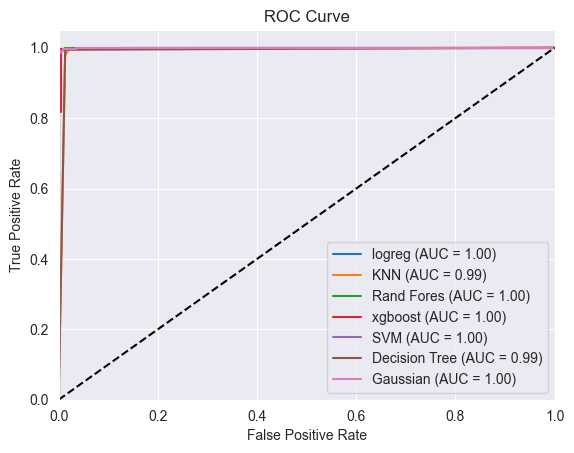

In [89]:
## Checking the cross validation score for each of the above algorithms

pipelines = [logreg_pipeline, knn_pipeline, randomforest_pipeline, xgboost_pipeline, svm_pipeline, tree_pipeline, gaussina_pipeline]
classifiers = ['logreg', 'KNN', 'Rand Fores', 'xgboost', 'SVM', 'Decision Tree', 'Gaussian']

skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=789)

for i in range(len(pipelines)):
    cv_score = cross_val_score(pipelines[i],train_X,train_y,scoring='accuracy', cv=skf)
    print(f"The cross validation score for the {classifiers[i]} based on accuracy score is {np.round(cv_score.mean(),3)} +/= {np.round(cv_score.std(),3)}")

    y_pred = cross_val_predict(pipelines[i], train_X, train_y, cv=skf)
    conf_matrix = confusion_matrix(train_y, y_pred)
    precision = precision_score(train_y, y_pred, average='weighted')
    recall = recall_score(train_y, y_pred, average='weighted')
    f1 = f1_score(train_y, y_pred, average='weighted')

    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

    print(f"Confusion Matrix:\n{conf_matrix}")

    y_probas = cross_val_predict(pipelines[i], train_X, train_y, cv=skf, method='predict_proba')
    fpr, tpr, thresholds = roc_curve(train_y, y_probas[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{classifiers[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df2.describe().loc[['min','max'],:].to_json("schema_in.json")